In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [91]:
def read_wham(location):
    n = 20
    all_wham_list = []
    for i in range(n):
        folder = "{}/simulation/{}/0/".format(location, i)
        file = "wham.dat"
        wham = pd.read_csv(folder+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)
    return wham

In [92]:
def top(df, n=1, column='Qw'):
    return df.sort_values(by=column)[-n:]

In [97]:
location = "/Users/weilu/Research/server/oct_2017/23oct/awsemer/test/2xov/"
backbone_list = ["awsemer", "er", "frag"]
all_wham_list = []

for backbone in backbone_list:
    wham = read_wham(location+backbone)
    data = wham.groupby("Run").apply(top).sort_values(by="Qw")
    data["Rank"] = data["Qw"].rank()
    all_wham_list.append(data.assign(Backbone=backbone))
wham = pd.concat(all_wham_list)

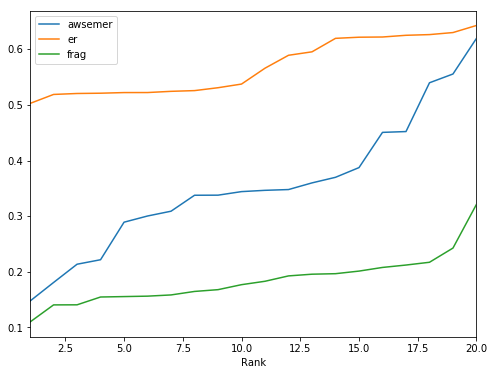

In [104]:
fig, ax = plt.subplots(figsize=(8,6))
for name, group in wham.groupby('Backbone'):
    group.plot("Rank", "Qw", ax=ax, label=name)

In [107]:
location = "/Users/weilu/Research/server/oct_2017/23oct/awsemer/2xov/"
backbone_list = ["awsemer", "er", "frag", "awsemer_no_frag"]
all_wham_list = []

for backbone in backbone_list:
    wham = read_wham(location+backbone)
    data = wham.groupby("Run").apply(top).sort_values(by="Qw")
    data["Rank"] = data["Qw"].rank()
    all_wham_list.append(data.assign(Backbone=backbone))
wham = pd.concat(all_wham_list)

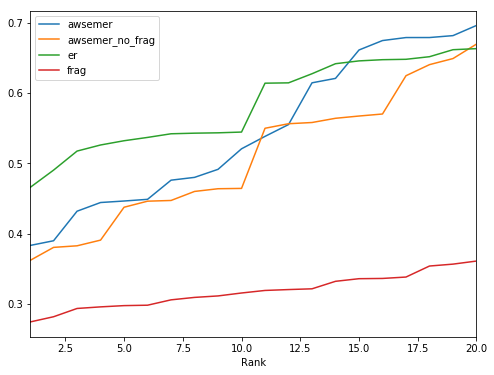

In [108]:
fig, ax = plt.subplots(figsize=(8,6))
for name, group in wham.groupby('Backbone'):
    group.plot("Rank", "Qw", ax=ax, label=name)